# Módulo: Python Avanzado  
## Tarea fin de modulo  
  
### Descripción  
Crear un algoritmo que genere nombres para un serie de servidores de forma aleatoria siguiendo unos parámetros.  
Estos nombres deben ser almacenados en un Dataframe y representar los datos con una serie de graficos.  


#### 1. Importar las librería necesaras

In [2]:
import pandas as pd
import random
from matplotlib import pyplot as plt

#### 2. Iniciar variables

In [3]:
df = None
hostnames_generados = []
dataset = []

#### 3. Crear una funcion generadora de hostnames  
  
Requerimientos:
- Nombre de la función: set_hostnames
- Argumentos:
  - number_of_hosts (int): tipo integer. Representa el numero de hosts a generar.
- El hostname generado por la funcion se debe componer de 8 caracteres alfanuméricos. Los caracteres estan definido por las carácteristicas de cada host. El algoritmo debe generarlos teniendo en cuenta una distribución especifica para cada caracteristica y atributos. A continuación se detallan, las caracteristicas (Sistema operativo, entorno, localización y nodo), la representación alfanumérica y las distribución de sus atributos correspondientes:
    - **Sistema Operativo:** define carácter 1 del hostname.
      - Linux: L, 40% 
      - Solaris: S, 30%
      - Aix: A, 20%
      - HP-UX: H, 10%
    - **Entorno:** defina el carácter 2 del hostname.
      - Development: D, 10%
      - Integration: I, 10%
      - Testing: T, 25%
      - Staging: S, 25%
      - Production: P, 30%
    - **Localización:** define los caracteres 3 al 5, representan el nombre del país de localización.
      - Norway: NOR, 6%
      - France: FRA, 9%
      - Italy: ITA, 16%
      - Spain: ESP, 16%
      - Germany: DEU, 23%
      - Ireland: IRL, 30%
    - **Nodo:** define los caracteres 6 al 8. Representan el numero de nodos existentes para cada combinación de SO, entorno y país. Valores incrementales desde 001 hasta 999.


In [4]:
def set_hostnames(number_of_hosts:int) -> None:
    """ Crea un número de hostnames aleatorios definido por el argumento number_of_hosts.
    - number_of_hosts (int): Número de hostnames a generar.

    La función devuelve un DataFrame con una columna llamada hostname cuyos valores son todos los hostnames generados.
    El formato del nombre de los hostnames es el siguiente:  
    [Sistema_operativo][Entorno][Localización][Número_de_nodo]  
    En total el hostname constara de 8 caracacteres en el siguiente orden:
    - Una letra para el sistema operativo. (linux = L, Solaris = S, AIX = A, HP-UX = H)
    - Una letra para el entorno. (Desarrollo = D, Integración = I, Test = T, Producción = P, Staging = S)
    - Tres letras para la localización. (Norway = NOR, France = FRA, Italy = ITA, Spain = ESP, Germany = DEU, Ireland = IRL)
    - Tres numeros para el número de nodo. (001, 002, 003, ... 999)

    El algoritmo genera los hostnames de forma aleatoria, pero siguiendo las distribuciones especificas.
    """
    # Delcaración de las variables globales
    global df
    
    # Listas ponderadas para la funcion choice de generación random de nombres de hosts
    so_list = ['L'] * 40 + ['S'] * 30 + ['A'] * 20 + ['H'] * 10
    env_list = ['D'] * 10 + ['I'] * 10 + ['T'] * 25 + ['S'] * 25 + ['P'] * 30
    loc_list = ['NOR'] * 6 + ['FRA'] * 9 + ['ITA'] * 16 + ['ESP'] * 16 + ['DEU'] * 23 + ['IRL'] * 30
    host_alpha = []

    # Construimos el hostname y lo añadimos a la lista maestra
    for i in range(number_of_hosts):
        
        # Generamos los 3 parametros del hostname aleatoriamente
        so = random.choice(so_list)
        env = random.choice(env_list)
        loc = random.choice(loc_list)

        # construimos la parte alfabetica del hostname
        hostname = so + env + loc

        # Guardamos en una lista los hosts creados
        host_alpha.append(hostname)

        # Obtenemos el número de nodo contando el numero de hosts de iguales parametros creados.
        nodo = str(host_alpha.count(hostname)).zfill(3)

        # Agregamos el numero del nodo al hostname
        hostname = hostname + nodo

        # Guardamos el hostname completo en la lista dataset
        hostnames_generados.append(hostname)
        

#### 4. Funcion para obtener el SO

Crear una función llamada **get_os** que reciba como argumento un **hostname** y devuelva el nombre del **sistema operativo**. En el caso de no reconoca el Sistema operativo debe retornar **"Unknown"**.

In [5]:
def get_os(hostname:str) -> str:
    """ Devuelve el sistema operativo de un hostname.
    - hostname (str): Nombre del host.

    La función devuelve un string con el sistema operativo del hostname.
    """
    hostname = hostname.upper()
    so_dict = {
        'L': 'Linux',
        'S': 'Solaris',
        'A': 'AIX',
        'H': 'HP-UX'
    }

    if hostname[0] in list(so_dict.keys()):
        return so_dict[hostname[0]]
    else:
        return 'Unknown'

#### 5. Función para obtener el entorno

Crear una función llamada **get_environment** que reciba como argumento un **hostname** y devuelva el nombre del entorno de ejecución. En caso de no reconocer el entorno devolverá "Unknown"

In [6]:
def get_environment(hostname:str) -> str:
    """ Devuelve el entorno de ejecución de un hostname.
    - hostname (str): Nombre del host.

    La función devuelve un string con el tipo de entorno de ejecución del hostname.
    """
    hostname = hostname.upper()
    env_dict = {
        'D': 'Development',
        'I': 'Integration',
        'T': 'Test',
        'S': 'Staging',
        'P': 'Production'
    }

    if hostname[1] in list(env_dict.keys()):
        return env_dict[hostname[1]]
    else:
        return 'Unknown'


#### 6. Funcion para obtener la localización

Crear una función llamada **get_country** que reciba como argumento un **hostname** y devuelva el nombre del país de localización. En caso de no reconocerlo devolverá "Unknown"

In [7]:
def get_country(hostname:str) -> str:
    """ Devuelve el país de localización de un hostname.
    - hostname (str): Nombre del host.

    La función devuelve un string con el país de localización del hostname.
    """
    hostname = hostname.upper()
    loc_dict = {
        'NOR': 'Norway',
        'FRA': 'France',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'DEU': 'Germany',
        'IRL': 'Ireland'
    }

    if hostname[2:5] in list(loc_dict.keys()):
        return loc_dict[hostname[2:5]]
    else:
        return 'Unknown'

#### 7. Crear una función para generar el DataFrame.
  
Crear una función llamada **set_dataframe** que recibe como argumento **count** de tipo integer que representa el numero de hostnames a generar.  
La función deberá llamar internamente a la funcion **set_hostnames** y utilizar la lista de diccionarios que esta genera como input para el dataframe.  
La salida de la función será None, sin embargo el dataframe generado se guardará en la variable **df** inicializada anteriormente.


In [8]:
def set_dataframe(count:int) -> None:
    """ Crea un DataFrame con un número de hostnames definido por el argumento count.
    - count (int)

    La función guarda el dataframe generado en la variable global df.
    """

    # Declaramos la variable global
    global df

    # Generamos los hostnames
    set_hostnames(count)

    for hostname in hostnames_generados:
        dataset.append(
            {
                'hostname': hostname,
                'os': get_os(hostname),
                'environment': get_environment(hostname),
                'country': get_country(hostname),
                'node': int(hostname[-3:])
            }
        )

    df = pd.DataFrame(dataset)

#### 8. Crear el DataFrame
  
Invocando la funcion **set_dataframe** crear 1500 hostnames e inpeccionar el resultado.

In [9]:
set_dataframe(1500)

In [10]:
# Exploramos los primeros 5 valores
df.head()

,hostname,os,environment,country,node
0,HTDEU001,HP-UX,Test,Germany,1
1,AIIRL001,AIX,Integration,Ireland,1
2,SPIRL001,Solaris,Production,Ireland,1
3,LSITA001,Linux,Staging,Italy,1
4,SPITA001,Solaris,Production,Italy,1


In [11]:
# Recuento de valores del SO
df.value_counts(['os'])

os     
Linux      586
Solaris    432
AIX        322
HP-UX      160
Name: count, dtype: int64

In [12]:
# Recuento de valores de entorno
df.value_counts(['environment'])

environment
Production     455
Staging        367
Test           352
Development    168
Integration    158
Name: count, dtype: int64

In [13]:
# Recuento de valores de país
df.value_counts(['country'])

country
Ireland    447
Germany    349
Italy      244
Spain      236
France     139
Norway      85
Name: count, dtype: int64

#### 9. Guardar el DataFrame generado en un fichero CSV
  
Guardar el dataframe en un archivo csv llamado **hosts.csv** en la misma carpeta.  
Este documento debe incluir las cabeceras y excluir el index.  
Verificar el corecto guardado de los datos, leyendo el csv y cargandolo en otro dataframe llamado **hosts_df**.

In [14]:
# Guardamos el dataframe en un archivo CSV
df.to_csv('hosts.csv', header=True, index=False)

In [15]:
# Leemos y cargamos el csv en otro dataframe
hosts_df = pd.read_csv('hosts.csv')
hosts_df.head()

,hostname,os,environment,country,node
0,HTDEU001,HP-UX,Test,Germany,1
1,AIIRL001,AIX,Integration,Ireland,1
2,SPIRL001,Solaris,Production,Ireland,1
3,LSITA001,Linux,Staging,Italy,1
4,SPITA001,Solaris,Production,Italy,1


#### 10. Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment)

<Axes: xlabel='country'>

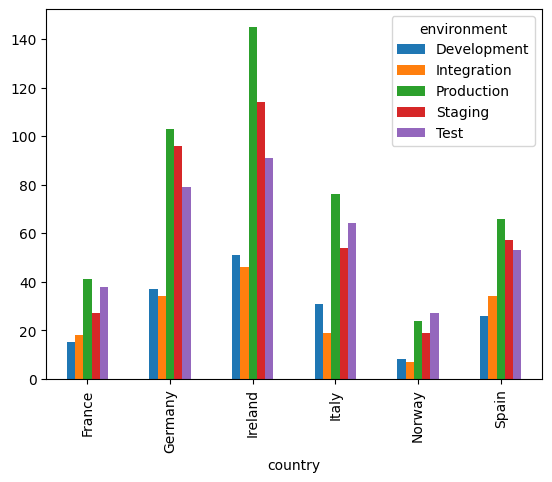

In [16]:
hosts_df[['country', 'environment']].value_counts().unstack().plot(kind='bar')

#### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas